<h2>Initializing the process by importing the necessary tools</h2>

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

<h2>Loading data from mnist dataset</h2>

In [79]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


<h2>Checking to see if data was loaded</h2>

Image (#9): Which is digit '4'


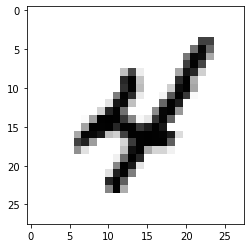

In [80]:
digit = 9 # Change to choose new digit
a = X_train[digit]
plt.imshow(a, cmap='binary')
print(f"Image (#{digit}): Which is digit '{Y_train[digit]}'")

<h4>Data loaded successfully</h4>

<h2>Laying out the entire dataset</h2>

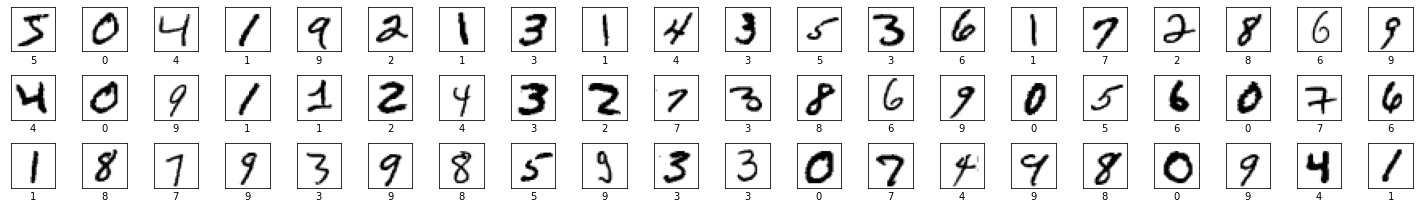

In [81]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.binary)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

<h2>Normalizing the testing and training data for future references</h2>

In [82]:
X_train_flat = X_train / 255
X_test_flat = X_test / 255

In [83]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train_flat = X_train_flat.reshape(-1,28,28,1)
X_test_flat = X_test_flat.reshape(-1,28,28,1)

In [69]:
X_train[0].shape

(28, 28, 1)

In [84]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

In [85]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

<h2>Training data to check the accuracy</h2>

In [86]:
h = model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 1.0831 - accuracy: 0.8378
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0872 - accuracy: 0.9727
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0668 - accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0578 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0488 - accuracy: 0.9849


In [87]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0608 - accuracy: 0.9818


[0.060756366699934006, 0.9818000197410583]

<h4 style='color:red;'>Accuracy was 98.18%, which was less than the requirement, which was 98.2%</h4>

<h2>Normalizing data for possibility of a higher accuracy</h2>

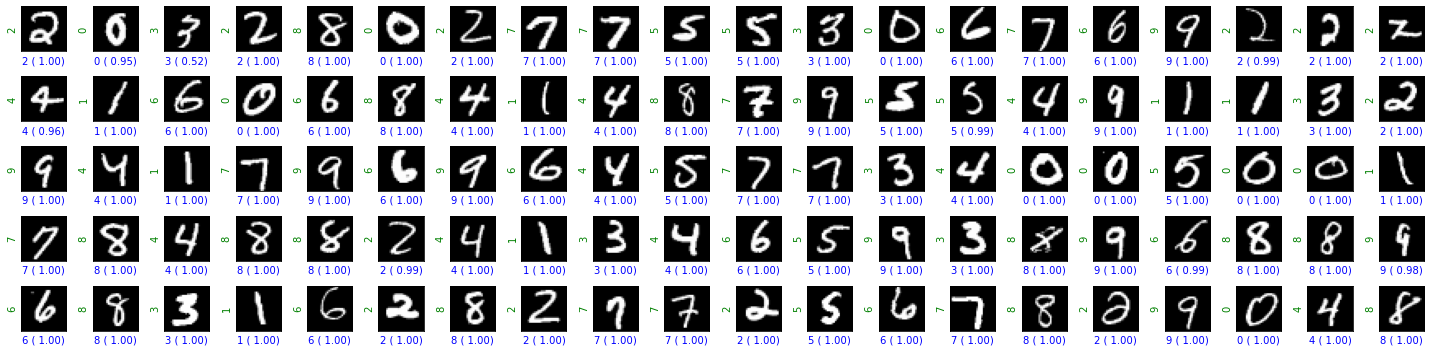

In [93]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(X_test_flattened.shape[0]), ROWS*COLS)
sample_images = X_test_flattened[random_indices, :]
sample_labels = Y_test[random_indices]
y_predicted = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(y_predicted[i]) 
        confidence = y_predicted[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

<h2>Training the newly normalized data</h2>

In [94]:
h = model.fit(X_train_flat, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0251 - accuracy: 0.9919
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0228 - accuracy: 0.9924
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0179 - accuracy: 0.9939
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 5/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0136 - accuracy: 0.9954


In [95]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0520 - accuracy: 0.9868


[0.052016325294971466, 0.9868000149726868]

<h4 style='color:green'>Data is found to be 98.68%, which is more accurate than before and higher than the requirement, which was 98.2%</h2>

<h2>Let us now use different optimizers: SGD and RMSprop</h2>

<h3>Using SGD as an optimizer</h3>

In [101]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [103]:
h = model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0075 - accuracy: 0.9980
Epoch 2/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0030 - accuracy: 0.9992
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0026 - accuracy: 0.99940s - loss: 0.0026 - accuracy: 0.
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0019 - accuracy: 0.9997


In [104]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0472 - accuracy: 0.9900


[0.047231774777173996, 0.9900000095367432]

<h4 style='color:green'>Data is found to be 99.00%, which is once again more accurate than before and higher than the requirement, which was 98.2%</h2>

<h3>Using RMSprop as an optimizer</h3>

In [ ]:
model.compile(
    optimizer='RMSprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [107]:
h = model.fit(x=X_train_flat, y=Y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 34s 51ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0024 - val_accuracy: 0.9997
Epoch 2/5
657/657 [==============================] - 32s 49ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 3/5
657/657 [==============================] - 32s 48ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0025 - val_accuracy: 0.9997
Epoch 4/5
657/657 [==============================] - 33s 50ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 5/5
657/657 [==============================] - 32s 49ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0025 - val_accuracy: 0.9996


In [109]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0479 - accuracy: 0.9897


[0.047909051179885864, 0.9897000193595886]

<h4 style='color:green'>Data is found to be 98.97%, which is once again more accurate than before and higher than the requirement, which was 98.2%</h2>

<h1 style="color: blue">Data normalization leads to more accurate results than without it. The results are even more accurate after using SGD and RMSprop.</h1>